In [1]:
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

discount, recovery_rate = 0.05, 0.4
maturity, coupon, bond_yield, face_value = 5, 0.06, 0.07, 1

# price the bond

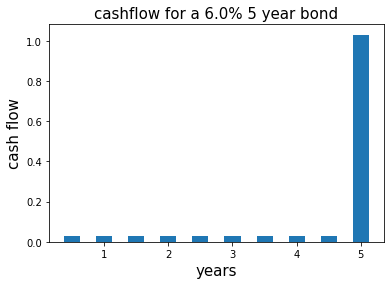


risk free price = 1.0409
corporate  bond price = 0.9534
expected loss from default = 0.0875



In [2]:
cashflow = [face_value * coupon / 2] * (maturity * 2)
cashflow[-1] += face_value

plt.bar(np.arange(0, len(cashflow)/2,0.5)+0.5, cashflow, width=0.25)
plt.title(f"cashflow for a {100 * coupon}% {maturity} year bond",fontsize=15)
plt.ylabel("cash flow",fontsize=15)
plt.xlabel("years",fontsize=15)
plt.show()

def bond_price_exp(cashflow, discount):
    """use exponential discount factor"""
    return sum([c * exp(-discount/2 * (i + 1)) for i, c in enumerate(cashflow)])
#     return sum([c / pow(1 + discount/2, i + 1) for i, c in enumerate(cashflow)])

risk_free_price = bond_price_exp(cashflow, discount)
bond_price = bond_price_exp(cashflow, bond_yield)
expected_loss = risk_free_price - bond_price
print(f"""
risk free price = {risk_free_price:0.4f}
corporate  bond price = {bond_price:0.4f}
expected loss from default = {expected_loss:0.4f}
""")

# calculate loss from bond default

In [3]:
3 * (1 + exp(-discount*0.5) + exp(-discount) + exp(-discount*1.5)) + 100 * exp(-discount*1.5)

104.33719710142807

In [4]:
default_free_value = \
    [coupon / 2 * sum([exp(-discount * t/2) for t in range(n+1)]) +  1 * exp(-discount * n/2)
    for n in np.arange(maturity * 2,0,-1)]

losses = pd.DataFrame([np.arange(0,maturity*2) / 2, 
                       default_free_value,
                       [recovery_rate] * (maturity * 2)],
                      index=['time','default_free_value','recovery']
                     ).transpose()

losses['loss'] = losses['default_free_value'] - losses['recovery']
losses['discount_factor'] = [exp(-discount * n/2) for n in range(maturity * 2)]
losses['expected_loss_pv'] = losses['loss'] * losses['discount_factor']
losses

,time,default_free_value,recovery,loss,discount_factor,expected_loss_pv
0,0.0,1.070936,0.4,0.670936,1.000000,0.670936
1,0.5,1.067287,0.4,0.667287,0.975310,0.650812
2,1.0,1.063546,0.4,0.663546,0.951229,0.631185
3,1.5,1.059710,0.4,0.659710,0.927743,0.612042
4,2.0,1.055778,0.4,0.655778,0.904837,0.593372
5,2.5,1.051745,0.4,0.651745,0.882497,0.575163
6,3.0,1.047611,0.4,0.647611,0.860708,0.557404
7,3.5,1.043372,0.4,0.643372,0.839457,0.540083
8,4.0,1.039026,0.4,0.639026,0.818731,0.523190
9,4.5,1.034569,0.4,0.634569,0.798516,0.506714


In [5]:
pv_of_losses = sum(losses['expected_loss_pv'])
print(f"present value of the sum of losses = {pv_of_losses:0.2f}")

present value of the sum of losses = 5.86


# present value of losses versus expected losses

In [6]:
print(f"expected loss from default = {expected_loss:0.4f}")
print(f"semi-annual loss probability = {expected_loss / pv_of_losses:0.5f}")

expected loss from default = 0.0875
semi-annual loss probability = 0.01493
